This file is part of LAO-STO.

Copyright (C) 2025 Julian Czarnecki

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

If you use this code for scientific research, please cite:
J. Czarnecki et. al.,
"Superconducting gap symmetry of 2DEG at (111)-oriented LaAlO3/SrTiO3 interface",
arXiv:2508.05075 (2025).
https://arxiv.org/abs/2508.05075

In [1]:
%load_ext autoreload
%autoreload 2
from DataReaderClass import *
from DispersionPlotterClass import *
from SymmetryResolverClass import *
from GammaAndFillingPlotter import *

SCRATCH_PATH = os.getenv("SCRATCH")

In [2]:
%%capture
    eMin = 0
    gammaAndFillingPlotter = GammaAndFillingPlotter(
        runsPath=os.path.join(SCRATCH_PATH, "KTO-SC", "KTO-E_Fermi_J_SC_NNN"),
        # runsPath=os.path.join(
        #     "/home", "jczarnecki", "LAO-STO-results", "LAO-STO-E_Fermi_J_SC_J_SC_NNN"
        # ),
        matchPattern="RUN_.*",
        nNeighbors=3,
        nNextNeighbors=6,
        eMinimal=eMin,
        sublattices=3,
        subbands=1,
        material="KTO",
    )

    gammaAndFillingPlotter.LoadFilling(loadUnfinished=True)
    gammaAndFillingPlotter.LoadGamma(xKeywords=("e_fermi", "j_sc_nnn"), loadUnfinished=True)
    gammaAndFillingPlotter.sortData()
    gammaAndFillingPlotter.CalculateSymmetryGamma()
    gammaAndFillingPlotter.getMaxvalSymmetrizedGamma()

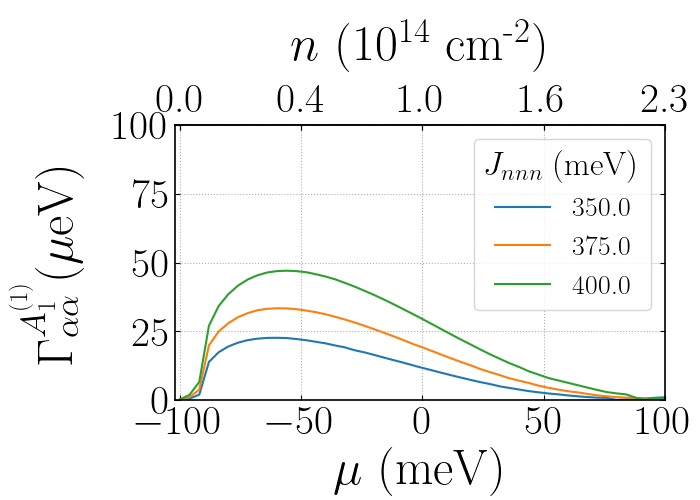

In [3]:
%matplotlib widget
gammaAndFillingPlotter.plotGammasFermi(firstXLabel=r"$\mu$ (meV)",
                                        neighborsToPlot=("next", ),
                                        plotSecondX=True,
                                        secondXLabel=r"$n$ (10\textsuperscript{14} cm\textsuperscript{-2})",
                                        legendTitles=(r"$J_{nnn}$ (meV)",),
                                        continuousColor=False,
                                        firstXShift=eMin,
                                        firstXMax=100,
                                        yMax=100,
                                        yUnit=r"($\mu$eV)")